## UFO SIGHTINGS PROJECT

Author: Rony Guerra

`The purpose` of this project is to conduct exploratory data analysis (EDA).
`The goal` is to to gain insights, discover patterns, and identify relationships within the dataset.

In [1]:
# Import libaries and packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from scipy.stats import chisquare
from scipy import stats
from wordcloud import WordCloud
import folium
from folium.plugins import HeatMap

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [2]:
# Load data from the csv file into a DataFrame
df = pd.read_csv('nuforc_reports.csv')

# Display first few rows of the dataframe
df.head()

summary country  \
0                                     MADAR Node 100     USA   
1  Steady flashing object with three lights hover...     USA   
2  Group of several orange lights, seemingly circ...     USA   
3  Dropped in flashed a few times and shot off 5 ...     USA   
4  Location: While traveling in a TGV, from Lille...  France   

                city state            date_time   shape    duration  \
0  Mountlake Terrace    WA  2019-06-23T18:53:00     NaN         NaN   
1             Hamden    CT  2019-06-23T20:00:00   light     5 hours   
2    Charlottesville    VA  2019-06-20T23:28:00  circle  15 seconds   
3       Lincoln Park    MI  2019-06-21T00:00:00   light   2 minutes   
4     Douai (France)   NaN  2019-06-07T20:00:00   cigar   5 minutes   

                                               stats  \
0  Occurred : 6/23/2019 18:53  (Entered as : 06/2...   
1  Occurred : 6/23/2019 20:00  (Entered as : 6/23...   
2  Occurred : 6/20/2019 23:28  (Entered as : 06/2...   
3  Occurred : 6/21/2019 00:00  (Entered as : 06/2...   
4  Occurred : 6/7/2019 20:00  (Entered as : 06/07...   

                                         report_link  \
0  http://www.nuforc.org/webreports/reports/147/S...   
1  http://www.nuforc.org/webreports/reports/147/S...   
2  http://www.nuforc.org/webreports/reports/146/S...   
3  http://www.nuforc.org/webreports/reports/146/S...   
4  http://www.nuforc.org/webreports/reports/146/S...   

                                                text               posted  \
0                                     MADAR Node 100  2019-06-27T00:00:00   
1  Steady flashing object with three lights hover...  2019-06-27T00:00:00   
2  Group of several orange lights, seemingly circ...  2019-06-27T00:00:00   
3  Dropped in flashed a few times and shot off 5 ...  2019-06-27T00:00:00   
4  Location:  While traveling in a TGV, from Lill...  2019-06-27T00:00:00   

   city_latitude  city_longitude  
0      47.794100     -122.306600  
1      41.373941      -72.921325  
2      38.055968      -78.494482  
3      42.238500      -83.178300  
4            NaN             NaN

In [3]:
# Gets descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df.describe()

city_latitude  city_longitude
count  115440.000000   115440.000000
mean       38.697147      -95.102130
std         5.736872       18.123691
min       -31.941922     -176.627400
25%        34.223597     -112.975200
50%        39.273300      -89.081250
75%        42.352576      -80.332976
max        70.639300      130.879729

In [4]:
# Check for missing data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141261 entries, 0 to 141260
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   summary         141189 non-null  object 
 1   country         140944 non-null  object 
 2   city            140783 non-null  object 
 3   state           131681 non-null  object 
 4   date_time       138601 non-null  object 
 5   shape           134962 non-null  object 
 6   duration        133645 non-null  object 
 7   stats           141261 non-null  object 
 8   report_link     141261 non-null  object 
 9   text            141227 non-null  object 
 10  posted          138601 non-null  object 
 11  city_latitude   115440 non-null  float64
 12  city_longitude  115440 non-null  float64
dtypes: float64(2), object(11)
memory usage: 14.0+ MB


There is missing data according to the results from the `info()` function. The `date_time` and `posted` columns need to be converted into a consistent datetime format.

In [5]:
# Displays basic information about the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumn names:")
print(df.columns)

Number of rows: 141261
Number of columns: 13

Column names:
Index(['summary', 'country', 'city', 'state', 'date_time', 'shape', 'duration',
       'stats', 'report_link', 'text', 'posted', 'city_latitude',
       'city_longitude'],
      dtype='object')


In [6]:
# Drop 'stats', 'report_link' and 'text' columns since it contains redundant information
df.drop(columns=['stats','report_link','text'], axis=1, inplace=True)

df.head()

summary country  \
0                                     MADAR Node 100     USA   
1  Steady flashing object with three lights hover...     USA   
2  Group of several orange lights, seemingly circ...     USA   
3  Dropped in flashed a few times and shot off 5 ...     USA   
4  Location: While traveling in a TGV, from Lille...  France   

                city state            date_time   shape    duration  \
0  Mountlake Terrace    WA  2019-06-23T18:53:00     NaN         NaN   
1             Hamden    CT  2019-06-23T20:00:00   light     5 hours   
2    Charlottesville    VA  2019-06-20T23:28:00  circle  15 seconds   
3       Lincoln Park    MI  2019-06-21T00:00:00   light   2 minutes   
4     Douai (France)   NaN  2019-06-07T20:00:00   cigar   5 minutes   

                posted  city_latitude  city_longitude  
0  2019-06-27T00:00:00      47.794100     -122.306600  
1  2019-06-27T00:00:00      41.373941      -72.921325  
2  2019-06-27T00:00:00      38.055968      -78.494482  
3  2019-06-27T00:00:00      42.238500      -83.178300  
4  2019-06-27T00:00:00            NaN             NaN

In [7]:
# Check for missing values in each column
missing_data = df.isnull().sum()
missing_data

summary              72
country             317
city                478
state              9580
date_time          2660
shape              6299
duration           7616
posted             2660
city_latitude     25821
city_longitude    25821
dtype: int64

In [8]:
# Fill missing values for 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
# Fill missing values for 'text' with 'No description available'
df['summary'].fillna('No description available', inplace=True)
# Fill missing values for 'shape' with 'Not specified'
df['shape'].fillna('Not specified', inplace=True)
# Fill missing values for 'duration' with 'Unknown'
df['duration'].fillna('Unknown', inplace=True)

In [9]:
# Drop rows with missing values in 'date_time' and 'posted'
df.dropna(subset=['date_time', 'posted'], inplace=True)

In [10]:
# Check for missing values after cleaning
df.isnull().sum()

summary               0
country               0
city                436
state              9315
date_time             0
shape                 0
duration              0
posted                0
city_latitude     25085
city_longitude    25085
dtype: int64

The `city` and `state` columns still has missing entries. The `city_latitude` and `city_longitude` columns each have 25,085 missing entries, indicating many reports without geolocation data.

In [11]:
# Parsing the 'date_time' and 'posted' columns to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df['posted'] = pd.to_datetime(df['posted'], errors='coerce')

In [12]:
df.dtypes

summary                   object
country                   object
city                      object
state                     object
date_time         datetime64[ns]
shape                     object
duration                  object
posted            datetime64[ns]
city_latitude            float64
city_longitude           float64
dtype: object

In [13]:
# Check unique values for 'duration' column
unique_duration = df['duration'].unique()
# Displays a random sample of unique durations
sample_duration = pd.Series(unique_duration).sample(20)
sample_duration

1419                    ~15min
10756                      10.
6467                 three hrs
8834           1 hour and over
11962           60-120 seconds
701                   one hour
2538                  6-8 min.
13541        It is still there
1402                18 seconds
11852    Currently still going
9295               5-8 Secinds
10344             30 to 1 hour
9231             1 min. 30 sec
3418                  3-5 mins
3378                  1/2hour+
9873        three to five min.
5047           appox: 1 minute
6351               10 /20 mins
7940                        1m
4051                 11minutes
dtype: object

The `duration` column contains a wide variety of formats and descriptions.

In [14]:
# This function will convert the most common formats in the 'duration' column to a standarized unit, such as seconds.
def duration_to_seconds(duration):
    # Convert hours to seconds
    hours_match = re.search(r'(\d+(\.\d+)?)\s*(h(ou)?r(s)?)', duration, re.IGNORECASE)
    hours = int(float(hours_match.group(1)) * 3600) if hours_match else 0
    
    # Convert minutes to seconds
    minutes_match = re.search(r'(\d+(\.\d+)?)\s*min', duration, re.IGNORECASE)
    minutes = int(float(minutes_match.group(1)) * 60) if minutes_match else 0
    
    # Convert seconds
    seconds_match = re.search(r'(\d+(\.\d+)?)\s*sec', duration, re.IGNORECASE)
    seconds = int(float(seconds_match.group(1))) if seconds_match else 0
    
    # If no match, return -1 (as a placeholder for non-parsable durations)
    if not (hours or minutes or seconds):
        return -1
    
    return hours + minutes + seconds

# Apply the conversion function to the 'duration' column
df['duration_seconds'] = df['duration'].apply(duration_to_seconds)

# Check the distribution of the converted values
duration_seconds_distribution = df['duration_seconds'].value_counts().head(20)
duration_seconds_distribution

-1       23019
 300     13173
 120      9882
 600      9433
 60       8214
 180      7791
 900      5930
 30       5446
 10       4921
 1200     4434
 5        4282
 1800     4090
 3600     3173
 15       3099
 240      3092
 20       2879
 3        2421
 7200     1969
 2        1832
 45       1477
Name: duration_seconds, dtype: int64

There were `23,019` entries in the `duration` column that could not be parsed so it was assigned a placeholder value of `-1`.

In [15]:
# Display unique values for 'country' column
unique_country = df['country'].unique()
unique_country

array(['USA', 'France', 'Israel', 'Canada', 'United Kingdom', 'Belize',
       'Curacao', 'India', 'Denmark', 'canada', 'Mexico', 'Kuwait',
       'Australia', 'SriLanka', 'East China Sea', 'South Africa',
       'Ireland', 'Russia', 'Uruguay', 'Unknown', 'Croatia', 'Serbia',
       'Germany', 'New Zealand', 'Netherlands The', 'American Samoa',
       'China', 'Czech Republic', 'Bermuda', 'Brazil', 'Greece', 'Spain',
       'United States\n\n\n', 'Morocco', 'Iran', 'Venezuela', 'Italy',
       'Perú', 'Vietnam', 'Cyprus', 'Bosnia and Herzegovina', 'Paraguay',
       'lat 2 deg 48 min N  124 deg W', 'Portugal', 'Colombia',
       'Slovakia', 'Pakistan', 'Barbados', 'Nicaragua', 'Jamaica',
       'Norway', 'Dublin Ireland', 'Netherlands', 'Puerto Rico',
       'Singapore', 'Turkey', 'Republic of Panama', 'US Virgin Islands',
       'Cuba/Florida (between)', 'Guam', 'North Wales', 'Andaman Islands',
       'Nauru', 'Philippines', 'Peru', 'Algeria', 'Finland',
       'Atlantic Ocean', 'Por

The unique entries in the `country` column contains multiple inconsistencies, variations, and misspellings.

In [16]:
df['country'].nunique()

426

In [17]:
country_mapping = {
    "u.s.a.": "united states",
    "usa": "united states",
    "us": "united states",
    "u.k.": "united kingdom",
    "uk": "united kingdom",
    "england": "united kingdom",
    "scotland": "united kingdom",
    "wales": "united kingdom"
}

# 1. Standardization - Strip leading and trailing whitespaces from 'country' column
df['country'] = df['country'].str.lower().str.strip()

# 2. Mapping Known Variations
df['country'] = df['country'].replace(country_mapping)

# 3. Correcting Typos Using a Predefined List

# List of known countries for the cleaning process
known_countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", "Denmark", "Djibouti",
    "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary", "Iceland",
    "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan",
    "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein",
    "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands",
    "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique",
    "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea",
    "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru",
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia",
    "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea",
    "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan",
    "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan",
    "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

known_countries_lower = [country.lower() for country in known_countries]

for unique_country in df['country'].unique():
    if unique_country not in known_countries_lower:
        # Find the closest match from the known countries list
        closest_match = min(known_countries_lower, key=lambda known: len(known) - len(unique_country) + unique_country.count(known))
        # Set a threshold for match length difference (e.g., 2 characters difference)
        if abs(len(closest_match) - len(unique_country)) <= 2:
            df['country'] = df['country'].replace(unique_country, closest_match)

# 4. Handle Specific Locations
specific_location_mapping = {
    "lake ontario": "canada/usa"
}
df['country'] = df['country'].replace(specific_location_mapping)

# 5. Handle Ambiguous Entries
df.loc[~df['country'].isin(known_countries_lower), 'country'] = "unknown"

# Displaying the unique values after cleaning
cleaned_countries_final = df['country'].unique()
cleaned_countries_final

array(['united states', 'france', 'israel', 'canada', 'united kingdom',
       'belize', 'unknown', 'india', 'denmark', 'mexico', 'kuwait',
       'australia', 'south africa', 'ireland', 'russia', 'uruguay',
       'croatia', 'serbia', 'germany', 'new zealand', 'china', 'brazil',
       'greece', 'spain', 'morocco', 'iran', 'venezuela', 'italy', 'chad',
       'vietnam', 'cyprus', 'bosnia and herzegovina', 'paraguay',
       'portugal', 'colombia', 'slovakia', 'pakistan', 'barbados',
       'nicaragua', 'jamaica', 'norway', 'netherlands', 'singapore',
       'turkey', 'nauru', 'philippines', 'peru', 'algeria', 'finland',
       'poland', 'albania', 'sri lanka', 'sweden', 'chile', 'costa rica',
       'thailand', 'bulgaria', 'honduras', 'austria', 'egypt', 'estonia',
       'ecuador', 'japan', 'ethiopia', 'malaysia', 'switzerland',
       'belgium', 'iraq', 'argentina', 'taiwan', 'dominican republic',
       'papua new guinea', 'palestine', 'seychelles', 'panama',
       'slovenia', 'ic

In [18]:
df['country'].nunique()

155

In [19]:
# Display unique values for 'state' column
unique_states = df['state'].unique()
unique_states

array(['WA', 'CT', 'VA', 'MI', nan, 'CA', 'CO', 'MT', 'MO', 'IN', 'MS',
       'TX', 'IL', 'NC', 'GA', 'AZ', 'AL', 'TN', 'NM', 'FL', 'NJ', 'MD',
       'IA', 'NY', 'NT', 'WI', 'MB', 'UT', 'KY', 'MA', 'ID', 'DE', 'MN',
       'SC', 'WV', 'SD', 'PA', 'LA', 'ON', 'OR', 'AR', 'NE', 'BC', 'OH',
       'WY', 'ME', 'ND', 'NV', 'KS', 'AB', 'NH', 'RI', 'OK', 'VT',
       'ULSTER', 'GLASGOW', 'AK', 'NEW SOUTH WALES', 'PERM KRAI',
       'CANELONES DEPARTMENT', 'CUMBRIA', 'MPUMALANGA', 'WIRRAL',
       'ZAJECAR DISTRICT', 'ANDAMAN AND NICOBAR ISLANDS',
       'LONDON BOROUGH OF BROMLEY', 'CANTERBURY REGION',
       'NORTHLAND REGION', 'COUNTY OFFALY', 'HIGHLAND', 'NS',
       'SOUTH LANARKSHIRE', 'ANGUS', 'NORTH HOLLAND', 'HAINAN',
       'BEROUN DISTRICT', 'SÃO PAULO', 'CHESHIRE EAST', 'SK', 'QUEBEC',
       'CÓRDOBA PROVINCE', 'HI', 'YUCATÁN', 'NEW YORK\n\n\n', 'WALES',
       'QC', 'EAST RIDING OF YORKSHIRE', 'SURREY', 'SOUTH AUSTRALIA',
       'NB', 'NORFOLK', 'ESSEX', 'HAMPSHIRE', 'SICILY', 

In [20]:
# Clean up the state column

# Remove any extra whitespace and newline characters
df['state'] = df['state'].str.upper().str.strip()

# Address known variations or inconsistencies
state_mapping = {
    'NEW YORK\n\n\n': 'NY',
    '\nMA': 'MA',
    'WASHINGTON, DC': 'DC',
    'ONTARIO (CANADA)A': 'ON',
    'M0': 'MO',  
    'M': 'MO', 
}

df['state'] = df['state'].replace(state_mapping)

# 3. Label all non-US state entries as 'INTERNATIONAL'
us_states = ['WA', 'CT', 'VA', 'MI', 'CA', 'CO', 'MT', 'MO', 'IN', 'MS',
             'TX', 'IL', 'NC', 'GA', 'AZ', 'AL', 'TN', 'NM', 'FL', 'NJ', 
             'MD', 'IA', 'NY', 'NT', 'WI', 'MB', 'UT', 'KY', 'MA', 'ID', 
             'DE', 'MN', 'SC', 'WV', 'SD', 'PA', 'LA', 'ON', 'OR', 'AR', 
             'NE', 'BC', 'OH', 'WY', 'ME', 'ND', 'NV', 'KS', 'AB', 'NH', 
             'RI', 'OK', 'VT', 'AK', 'HI', 'QC', 'DC', 'PR', 'VI', 'GU', 'NL', 'YT', 'NS', 'PE']

df['state'] = df['state'].apply(lambda x: 'INTERNATIONAL' if x not in us_states else x)

# Check unique values in the state column after cleaning
cleaned_states = df['state'].unique()
cleaned_states

array(['WA', 'CT', 'VA', 'MI', 'INTERNATIONAL', 'CA', 'CO', 'MT', 'MO',
       'IN', 'MS', 'TX', 'IL', 'NC', 'GA', 'AZ', 'AL', 'TN', 'NM', 'FL',
       'NJ', 'MD', 'IA', 'NY', 'NT', 'WI', 'MB', 'UT', 'KY', 'MA', 'ID',
       'DE', 'MN', 'SC', 'WV', 'SD', 'PA', 'LA', 'ON', 'OR', 'AR', 'NE',
       'BC', 'OH', 'WY', 'ME', 'ND', 'NV', 'KS', 'AB', 'NH', 'RI', 'OK',
       'VT', 'AK', 'NS', 'HI', 'QC', 'DC', 'PR', 'NL', 'YT', 'VI', 'PE'],
      dtype=object)

In [21]:
unique_city = df['city'].unique()
city_sample = pd.Series(unique_city).sample(10)
city_sample

11608                             Northeast Kingdom
21496                                     Dutchtown
2625                                     Seagoville
11420                         Guanica (Puerto Rico)
12667                                    Glen House
12347                                          Blue
4418                                      Ashtabula
8117     Sainte-Suzanne (near Switzerland) (France)
16388                                 Morin Heights
1203                                     Snellville
dtype: object

In [22]:
# Identify Common Patterns/Typos in 'city' column
non_alphanumeric_cities = df[df['city'].str.contains('[^a-zA-Z\s]', na=False)]['city'].unique()

# Handle Ambiguous Entries
short_cities = df[df['city'].str.len() < 3]['city'].unique()

non_alphanumeric_cities, short_cities

(array(['Douai (France)', 'Haifa (Israel)', 'Reading (UK/England)', ...,
        'Citrus Park, Tampa', 'New Port Richey, Florida', 'Bahía Blanca'],
       dtype=object),
 array(['??', '-', 'na', '?', 'PA', 'N.', 'CA', 'NV', 'CT', 'NJ', 'SC',
        'VA', 'CO', 'GA', 'cl', 'VT', 'J6', 'N', 'NY'], dtype=object))

In [23]:
# Correcting Non-Alphanumeric Cities
# Extract just the city name for entries that contain additional information in parentheses
df['city'] = df['city'].str.replace(r'\(.*\)', '', regex=True).str.strip()
# For entries with commas, take the first part as the city name
df['city'] = df['city'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Handle Short/Ambiguous Cities
# Replace city names that are too short or ambiguous with "unknown"
ambiguous_cities = ['??', '?', '-', 'n.', 'j6', 'n']
df.loc[df['city'].isin(ambiguous_cities), 'city'] = "unknown"

# Display the unique city names after corrections to inspect the values
unique_cities_cleaned = df['city'].unique()
unique_cities_cleaned

array(['Mountlake Terrace', 'Hamden', 'Charlottesville', ...,
       'Jumping Branch', 'Laureldale', 'Cappagh'], dtype=object)

In [24]:
unique_cities = df['city'].unique()
sample_cities = pd.Series(unique_cities).sample(20)
sample_cities

19414                        Honeybrook
10447                             Magog
349                              Carmel
21946                        clarksburg
13337                              Atco
4636                    Jamaica Estates
2148                            Baytown
21582                            Örebro
20388                           Medilia
10053                         Four Oaks
3986                      Crescent Lake
9165                       Chichen Itza
16766                       Kuwait City
2150                             Poteau
16778                             Remus
2078     Braintree and RAF Weatherfield
864                            Waukesha
696                            Granbury
20142                    Point Makenzie
19277                  Unknown location
dtype: object

In [25]:
# Check for duplicates
df.duplicated().sum()

5

In [26]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [27]:
# Strip leading and trailing whitespaces from text columns
df['city'] = df['city'].str.lower().str.strip()
df['shape'] = df['shape'].str.lower().str.strip()
df['summary'] = df['summary'].str.lower().str.strip()

In [28]:
df.head()

summary        country  \
0                                     madar node 100  united states   
1  steady flashing object with three lights hover...  united states   
2  group of several orange lights, seemingly circ...  united states   
3  dropped in flashed a few times and shot off 5 ...  united states   
4  location: while traveling in a tgv, from lille...         france   

                city          state           date_time          shape  \
0  mountlake terrace             WA 2019-06-23 18:53:00  not specified   
1             hamden             CT 2019-06-23 20:00:00          light   
2    charlottesville             VA 2019-06-20 23:28:00         circle   
3       lincoln park             MI 2019-06-21 00:00:00          light   
4              douai  INTERNATIONAL 2019-06-07 20:00:00          cigar   

     duration     posted  city_latitude  city_longitude  duration_seconds  
0     Unknown 2019-06-27      47.794100     -122.306600                -1  
1     5 hours 2019-06-27      41.373941      -72.921325             18000  
2  15 seconds 2019-06-27      38.055968      -78.494482                15  
3   2 minutes 2019-06-27      42.238500      -83.178300               120  
4   5 minutes 2019-06-27            NaN             NaN               300

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138596 entries, 0 to 141260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   summary           138596 non-null  object        
 1   country           138596 non-null  object        
 2   city              138160 non-null  object        
 3   state             138596 non-null  object        
 4   date_time         138596 non-null  datetime64[ns]
 5   shape             138596 non-null  object        
 6   duration          138596 non-null  object        
 7   posted            138596 non-null  datetime64[ns]
 8   city_latitude     113512 non-null  float64       
 9   city_longitude    113512 non-null  float64       
 10  duration_seconds  138596 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 12.7+ MB


In [30]:
df['city'].isnull().sum()

436

In [31]:
df.dropna(subset=['city'], inplace=True)

In [32]:
df.isnull().sum()

summary                 0
country                 0
city                    0
state                   0
date_time               0
shape                   0
duration                0
posted                  0
city_latitude       24648
city_longitude      24648
duration_seconds        0
dtype: int64

In [33]:
# Save the cleaned data to a new CSV file
df.to_csv("cleaned_ufo_sightings_data.csv", index=False)

## Display a line chart showing the trend of UFO sightings over the years

In [34]:
# Extract year from datetime
df['year'] = df['date_time'].dt.year
# Group by year and count sightings
yearly_sightings = df.groupby('year')['year'].count()
yearly_sightings

year
1969     205
1970     204
1971     157
1972     229
1973     301
1974     346
1975     401
1976     364
1977     367
1978     440
1979     329
1980     324
1981     217
1982     237
1983     236
1984     230
1985     274
1986     251
1987     298
1988     307
1989     334
1990     336
1991     307
1992     341
1993     399
1994     529
1995    1510
1996    1033
1997    1492
1998    2038
1999    3104
2000    3128
2001    3557
2002    3711
2003    4432
2004    4748
2005    4516
2006    3860
2007    4744
2008    5314
2009    5011
2010    4827
2011    5660
2012    8163
2013    7850
2014    8756
2015    6977
2016    5755
2017    5135
2018    3511
2019    6341
2020    7325
2021    3459
2022    4240
Name: year, dtype: int64

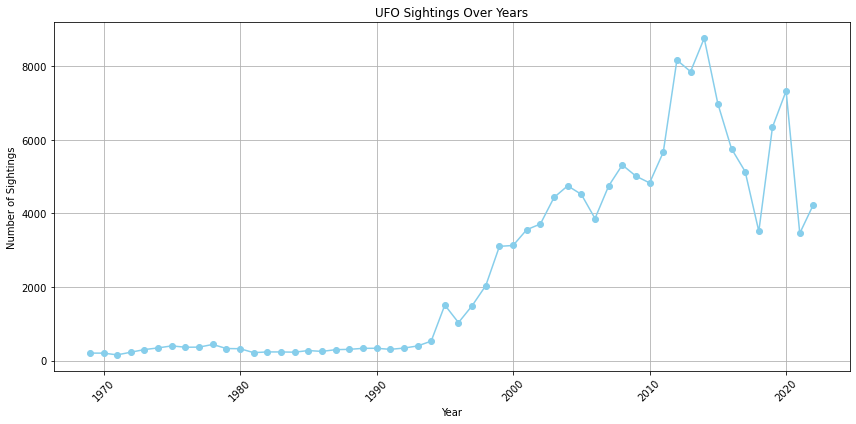

In [35]:
# Create a line chart for UFO sightings over years
plt.figure(figsize=(12, 6))
yearly_sightings.plot(marker='o', color='skyblue')
plt.title('UFO Sightings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
# Save the plot
plt.savefig('yearly_sightings_v1.png', bbox_inches='tight')
plt.show()

The line chart displays the trend of UFO sightings over the years. From the early 1900s to the mid-1990s, the number of UFO sightings was relatively low. However, there's a noticeable increase in reports starting from the mid-1990s, peaking around 2014. After 2014, there's a decline in the number of reported sightings. This could be due to various reasons, including changes in reporting mechanisms, public interest, or actual UFO activity. The data for the earlier years (before the 1960s) is sparse, which might be due to fewer reporting mechanisms or lower public awareness during those times.

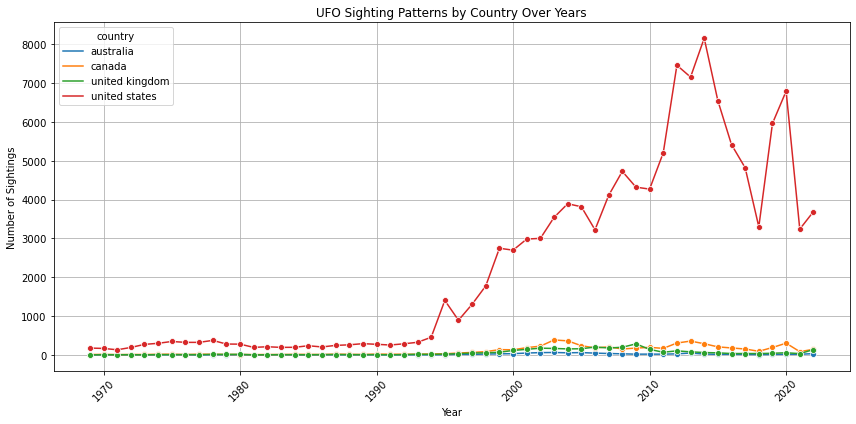

In [36]:
# Group by country and year, and count sightings
country_yearly_sightings = df.groupby(['country', 'year'])['year'].count().reset_index(name='sightings')

# Choose specific countries or regions to compare
selected_countries = ['united states', 'canada', 'united kingdom', 'australia']

# Filter data for selected countries
selected_country_data = country_yearly_sightings[country_yearly_sightings['country'].isin(selected_countries)]

# Create a line plot to compare UFO sighting patterns between countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_country_data, x='year', y='sightings', hue='country', marker='o')
plt.title('UFO Sighting Patterns by Country Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.savefig('country_yearly_sightings_v1.png', bbox_inches='tight')
plt.show()

The chart represents the UFO sightings by country over the years. The United States clearly has the highest number of reported sightings, and there's a noticeable increase in the number of sightings starting from the mid-1990s. Canada and the United Kingdom have a similar trend, with the number of sightings increasing over the years but remaining significantly lower than the United States. Australia has the lowest number of reported sightings among the four countries, but there's a slight uptick in the recent years. It's worth noting that various factors can influence these trends, such as population density, media influence, and cultural differences regarding the reporting of UFO sightings.

In [37]:
top_countries = df['country'].value_counts().head(5)
top_countries

united states     123285
canada              5617
united kingdom      3070
australia            872
unknown              755
Name: country, dtype: int64

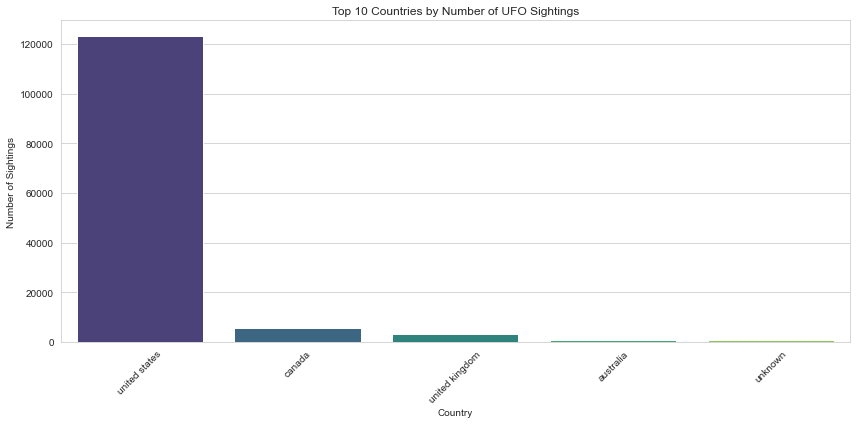

In [38]:
# Plot the top countries with most sightings
sns.set_style('whitegrid')
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Number of UFO Sightings')
plt.ylabel('Number of Sightings')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('top_countries_v1.png', bbox_inches='tight')
plt.show()

The bar chart displays the top 5 countries by the number of UFO sightings. The United States has the highest number of UFO sightings since the dataset originates from a U.S.-based organization. Canada is the second most frequent country for UFO sightings, but the count is much lower than that of the United States. The remaining countries have significantly fewer sightings compared to the United States and Canada.

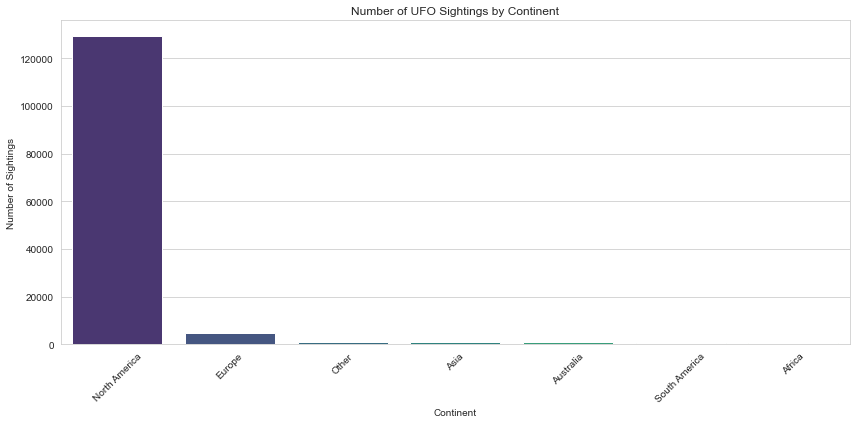

In [39]:
# Define custom countries groups to their respective continents

continent_mapping = {
    'united states': 'North America', 'canada': 'North America', 'mexico': 'North America', 
    'belize': 'North America', 'jamaica': 'North America', 'bahamas': 'North America', 
    'barbados': 'North America', 'costa rica': 'North America', 'dominican republic': 'North America', 
    'el salvador': 'North America', 'guatemala': 'North America', 'honduras': 'North America', 
    'nicaragua': 'North America', 'panama': 'North America', 'trinidad and tobago': 'North America',

    'france': 'Europe', 'united kingdom': 'Europe', 'denmark': 'Europe', 'ireland': 'Europe', 
    'russia': 'Europe', 'croatia': 'Europe', 'serbia': 'Europe', 'germany': 'Europe', 
    'greece': 'Europe', 'spain': 'Europe', 'italy': 'Europe', 'cyprus': 'Europe', 
    'bosnia and herzegovina': 'Europe', 'portugal': 'Europe', 'slovakia': 'Europe', 
    'norway': 'Europe', 'netherlands': 'Europe', 'finland': 'Europe', 'poland': 'Europe', 
    'albania': 'Europe', 'sweden': 'Europe', 'austria': 'Europe', 'estonia': 'Europe', 
    'switzerland': 'Europe', 'belgium': 'Europe', 'iceland': 'Europe', 'slovenia': 'Europe', 
    'romania': 'Europe', 'ukraine': 'Europe', 'luxembourg': 'Europe', 'lithuania': 'Europe', 
    'belarus': 'Europe', 'monaco': 'Europe', 'montenegro': 'Europe',

    'israel': 'Asia', 'kuwait': 'Asia', 'india': 'Asia', 'china': 'Asia', 'vietnam': 'Asia', 
    'singapore': 'Asia', 'turkey': 'Asia', 'nauru': 'Asia', 'japan': 'Asia', 'south korea': 'Asia', 
    'malaysia': 'Asia', 'iraq': 'Asia', 'united arab emirates': 'Asia', 'qatar': 'Asia', 
    'saudi arabia': 'Asia', 'kazakhstan': 'Asia', 'jordan': 'Asia', 'maldives': 'Asia', 
    'bahrain': 'Asia', 'armenia': 'Asia', 'yemen': 'Asia', 'georgia': 'Asia', 'turkmenistan': 'Asia',

    'australia': 'Australia', 'papua new guinea': 'Australia', 'tuvalu': 'Australia', 'indonesia': 'Australia', 
    'fiji': 'Australia', 'tonga': 'Australia', 'vanuatu': 'Australia', 'palau': 'Australia',

    'uruguay': 'South America', 'brazil': 'South America', 'paraguay': 'South America', 'colombia': 'South America', 
    'chile': 'South America', 'venezuela': 'South America', 'argentina': 'South America', 'peru': 'South America', 
    'ecuador': 'South America', 'bolivia': 'South America', 'suriname': 'South America', 'guyana': 'South America',

    'south africa': 'Africa', 'chad': 'Africa', 'morocco': 'Africa', 'algeria': 'Africa', 'egypt': 'Africa', 
    'ethiopia': 'Africa', 'seychelles': 'Africa', 'tunisia': 'Africa', 'libya': 'Africa', 'nigeria': 'Africa', 
    'uganda': 'Africa', 'brunei': 'Africa', 'congo': 'Africa', 'senegal': 'Africa', 'kenya': 'Africa', 
    'liberia': 'Africa', 'namibia': 'Africa', 'botswana': 'Africa', 'mauritius': 'Africa', 'zimbabwe': 'Africa', 
    'cameroon': 'Africa', 'angola': 'Africa', 'guinea': 'Africa', 'djibouti': 'Africa', 'lesotho': 'Africa', 
    'malawi': 'Africa', 'zambia': 'Africa', 'mozambique': 'Africa', 'tanzania': 'Africa',

    'unknown': 'Other', 'palestine': 'Other', 'philippines': 'Other', 'barbados': 'Other', 'bahamas': 'Other', 
    'costa rica': 'Other', 'nicaragua': 'Other', 'cuba': 'Other', 'latvia': 'Other', 'nepal': 'Other', 
    'haiti': 'Other', 'myanmar': 'Other', 'oman': 'Other', 'grenada': 'Other', 'gambia': 'Other', 
    'ghana': 'Other', 'laos': 'Other', 'saint lucia': 'Other', 'mongolia': 'Other', 'burkina faso': 'Other', 
    'somalia': 'Other', 'azerbaijan': 'Other', 'syria': 'Other', 'belize': 'Other', 'afghanistan': 'Other', 
    'bangladesh': 'Other', 'kyrgyzstan': 'Other'
}

# Apply the mapping to the 'country' column to create a new 'continent' column
df['continent'] = df['country'].map(continent_mapping)

# Group by 'continent' and count sightings
grouped_sightings = df['continent'].value_counts()

# Plot the continents with most sightings
sns.set_style('whitegrid')
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_sightings.index, y=grouped_sightings.values, palette="viridis")
plt.title('Number of UFO Sightings by Continent')
plt.ylabel('Number of Sightings')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('continent_sightings_v1.png', bbox_inches='tight')
plt.show()

The region with the highest recorded UFO sightings is North America, followed by Europe, other areas, Asia, Australia, South America, and Africa.

In [40]:
# Grouping by state and counting the number of sightings
state_sightings = df[df['country'] == 'united states'].groupby('state').size().sort_values(ascending=False)

# Displaying the top states with the highest number of sightings
top_states_sightings = state_sightings.head(10)
top_states_sightings

state
CA    15152
FL     7707
WA     6780
TX     5661
NY     5474
AZ     4695
PA     4658
OH     4154
IL     4029
NC     3429
dtype: int64

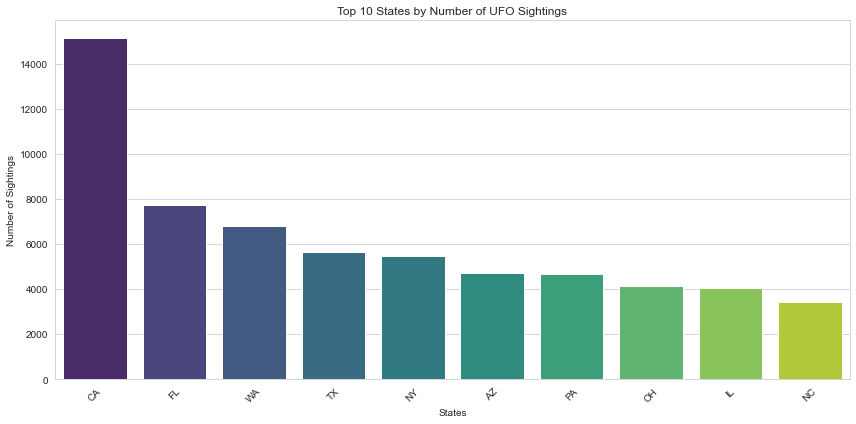

In [41]:
# Plot the top countries with most sightings
sns.set_style('whitegrid')
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states_sightings.index, y=top_states_sightings.values, palette="viridis")
plt.title('Top 10 States by Number of UFO Sightings')
plt.ylabel('Number of Sightings')
plt.xlabel('States')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('top_states_v1.png', bbox_inches='tight')
plt.show()

The bar plot showcases the top 10 US states with the highest number of UFO sightings. California leads the count by a significant margin, followed by states like Florida (FL), Texas (TX), and New York (NY).

In [42]:
top_cities = df['city'].value_counts().head(10)
top_cities

new york       839
phoenix        791
seattle        768
las vegas      675
portland       651
san diego      563
los angeles    560
houston        459
tucson         446
chicago        433
Name: city, dtype: int64

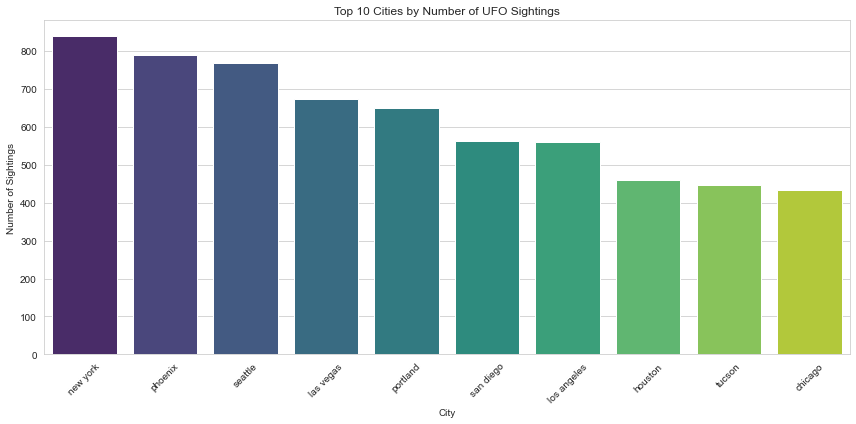

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.title('Top 10 Cities by Number of UFO Sightings')
plt.ylabel('Number of Sightings')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('top_cities_v1.png', bbox_inches='tight')
plt.show()

## Seasonal Insights

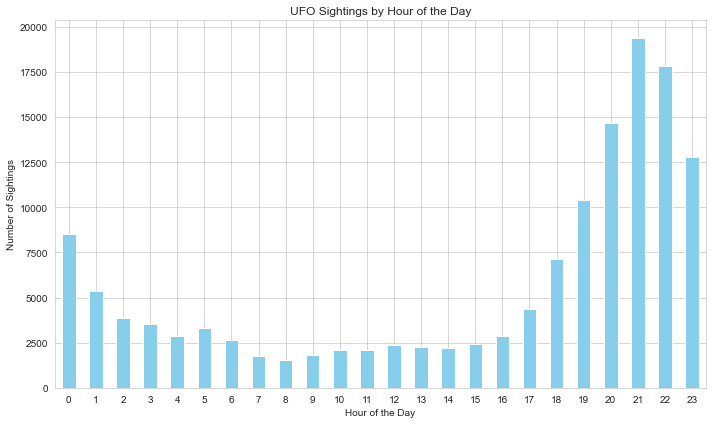

In [44]:
# Extract the hour from the 'date_time' column
df['hour'] = df['date_time'].dt.hour

# Group by the hour of the day and count sightings
hourly_sightings = df.groupby('hour')['hour'].count()

# Create a bar chart for UFO sightings by hour
plt.figure(figsize=(10, 6))
hourly_sightings.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('hourly_sightings_v1.png', bbox_inches='tight')
plt.show()

From the data, it appears that the highest number of sightings occur between 21:00 and 22:00 (9 PM to 10 PM). The sightings then begin to decrease gradually throughout the night and are lowest during the morning and early afternoon hours.

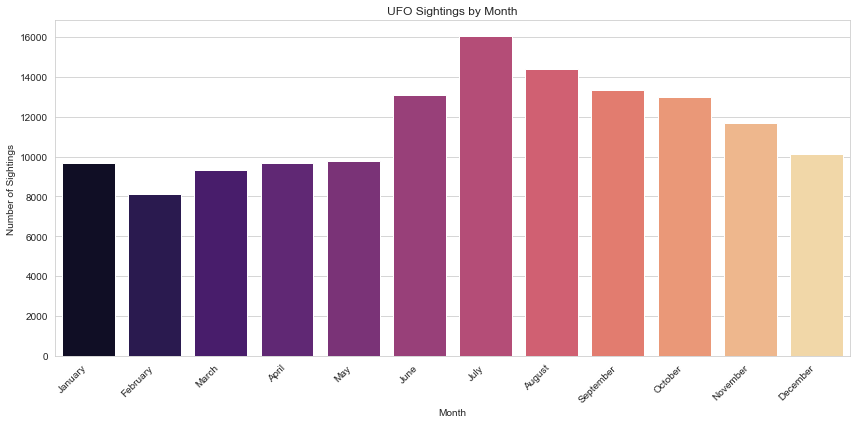

In [45]:
# Extract the month name from the 'date_time' column
df['month_str'] = df['date_time'].dt.month_name()

top_months = df['month_str'].value_counts()

month_order = ['January', 'February','March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a bar chart for the most common shapes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_months.index, y=top_months.values, palette="magma", order=month_order)
plt.title('UFO Sightings by Month')
plt.ylabel('Number of Sightings')
plt.xlabel('Month')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()

plt.savefig('top_months_v1.png', bbox_inches='tight')
plt.show()

July has the highest number of reported UFO sightings, while February has the fewest. This trend might be due to the clear summer skies in the Northern Hemisphere during July, making it easier for people to obseerve the sky. On the other hand, February, being one of the winter months, might have fewer clear days, leading to fewer reported sightings.

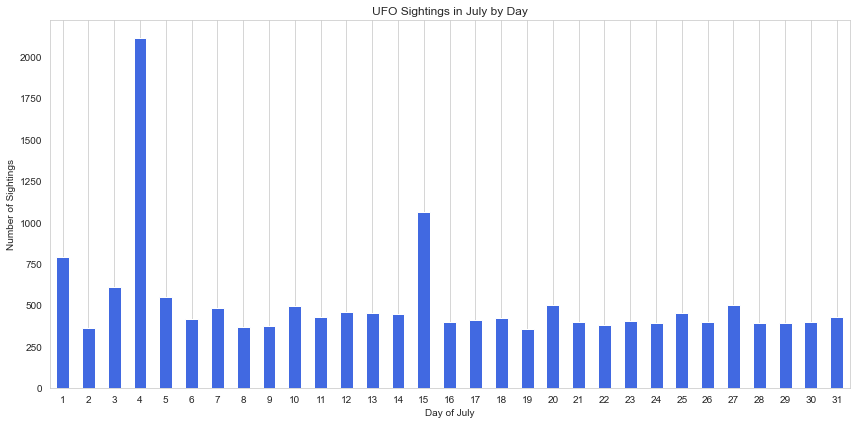

In [46]:
# Extract the day from the 'date_time' column
df['day'] = df['date_time'].dt.day

# Filter the data by month of July
july_data = df[df['month_str'] == 'July']

# Group by day and count the sightings
july_day_count = july_data.groupby('day').size()

# Plotting the day-wise counts for July
plt.figure(figsize=(12, 6))
july_day_count.plot(kind='bar', color='royalblue')
plt.title('UFO Sightings in July by Day')
plt.xlabel('Day of July')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('july_day_count_v1.png', bbox_inches='tight')
plt.show()

The visualization provides a day-by-day breakdown of UFO sightings in July. Sightings appear to be fairly consistent across most days. However, there's a noticeable peak around the 4th of July. This is likely due to the fact that many people are outdoors watching fireworks for the Independence Day celebrations in the United States, leading to an increased number of reported UFO sightings. Apart from the 4th, there are no other significant peaks or patterns in the data for July. It's worth noting that the spike on July 4th might also be influenced by misidentifications of fireworks, lanterns, or other objects commonly seen in the sky during the Independence Day celebrations.

In [47]:
# Extracting the date part from the 'date_time' column
df['sighting_date'] = df['date_time'].dt.date

# Grouping the data by the extracted date and counting the number of sightings for each date
sightings_by_sighting_date = df.groupby('sighting_date').size().reset_index(name='count')

# Sorting the data to find dates with the highest number of sightings
top_dates = sightings_by_sighting_date.sort_values(by='count', ascending=False).head(10)
top_dates

sighting_date  count
10746    2015-11-07    288
10255    2014-07-04    271
8794     2010-07-04    211
9525     2012-07-04    200
4917     1999-11-16    195
9890     2013-07-04    185
10620    2015-07-04    180
9159     2011-07-04    163
8506     2009-09-19    129
11009    2016-07-27    104

Top 10 dates with the highest number of UFO sightings. July 4th appears repeatedly in the list, suggesting a notable pattern or trend. Given that July 4th is the Independence Day of the United States, it's likely that many of the reported sightings could be related to fireworks, lanterns, or other celebratory displays. The spike on November 7, 2015, and November 16, 1999, is intriguing and might need further investigation to understand the reason behind such a significant number of reports on those specific days.

## Unmasking Geographical Hotspots

In [48]:
df.dropna(subset=['city_latitude', 'city_longitude'], inplace=True)

In [49]:
# Create a basic map focused on North America (as the majority of sightings are there)
m = folium.Map(location=[df['city_latitude'].mean(), df['city_longitude'].mean()], zoom_start=4)

# Prepare heatmap data
heat_data = [[row['city_latitude'], row['city_longitude']] for index, row in df.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(m)

# Save folium map as an HTML
m.save('heat_map_sightings.html')

m

The heatmap showcases the geogrphical distribution of UFO sightings. Areas with a higher concentration of sightings are represented by warmer colors (reds), while areas with fewer sightings are represented by cooler colors (blues). The United States, especially the coastal regions and areas around the Great Lakes, has a high concentration of sightings.
There are also notable concentrations in parts of Canada and Australia.
You can zoom in and out of the map to explore different regions in more detail.

In [50]:
# Defining a list of major cities to represent 'urban' areas
major_cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", 
    "Dallas", "San Jose", "Austin", "Jacksonville", "Fort Worth", "Columbus", "San Francisco", "Charlotte", 
    "Indianapolis", "Seattle", "Denver", "Washington", "Boston", "El Paso", "Nashville", "Detroit", "Oklahoma City", 
    "Portland", "Las Vegas", "Memphis", "Louisville", "Baltimore", "Milwaukee", "Albuquerque", "Tucson", "Fresno",
    "Sacramento", "Kansas City", "Long Beach", "Mesa", "Atlanta", "Colorado Springs", "Virginia Beach", "Raleigh", 
    "Omaha", "Miami", "Oakland", "Minneapolis", "Tulsa", "Wichita", "New Orleans", "Arlington", 
    # Major cities in Canada
    "Toronto", "Montreal", "Vancouver", "Calgary", "Edmonton", "Ottawa", "Quebec City", "Winnipeg", "Hamilton",
    # Major cities in UK
    "London", "Birmingham", "Liverpool", "Nottingham", "Sheffield", "Bristol", "Manchester", "Leeds", "Edinburgh", "Glasgow",
    # Major cities in Australia
    "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Gold Coast", "Canberra", "Newcastle", "Wollongong"
]

cities_in_data = df['city'].unique()

# Checking the intersection between the cities in the data and the major cities list
matching_cities = set([city.lower() for city in major_cities]).intersection(set(cities_in_data))

# Categorize cities as 'urban' or 'rural'
df['area_type'] = df['city'].apply(lambda x: 'Urban' if x in matching_cities else 'Rural')

# Count sightings in urban vs. rural
area_counts = df['area_type'].value_counts()
area_counts

Rural    96821
Urban    16691
Name: area_type, dtype: int64

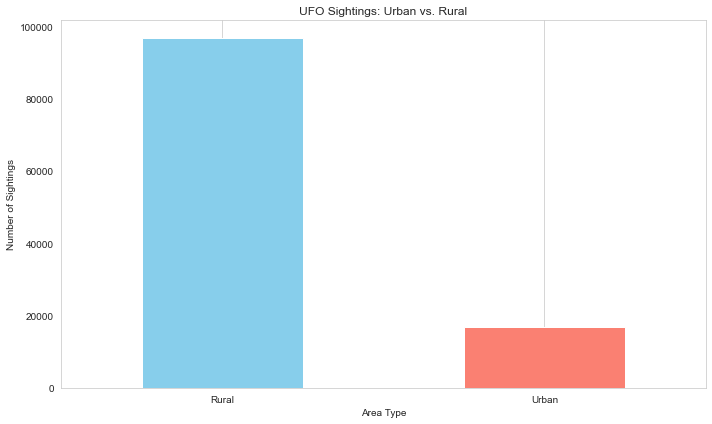

In [51]:
# Plotting the urban vs. rural sightings
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('UFO Sightings: Urban vs. Rural')
plt.xlabel('Area Type')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()

plt.savefig('urban_vs_rural_v1.png', bbox_inches='tight')
plt.show()

The bar chart compares UFO Sightings in urban and rural areas. From the chart, it's evident that UFO sightings are more frequent in rural areas compared to urban areas. This could be due to various reasons, such as clearer skies in rural areas, less light pollution making it easier to spot unusual aerial phenomena, or simply because of larger land areas classified as rural compared to urban.

## Decoding UFO Characteristics

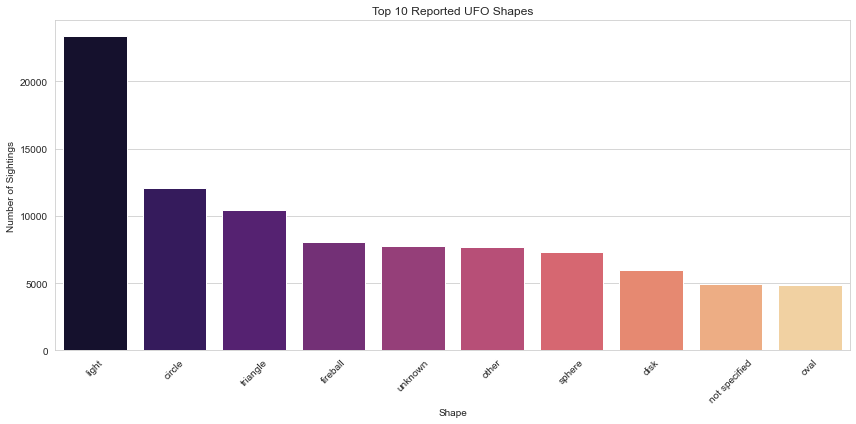

In [52]:
# Group by 'shape' and count sightings
shape_counts = df['shape'].value_counts().head(10)

# Create a bar chart for the most common shapes
plt.figure(figsize=(12, 6))
sns.barplot(x=shape_counts.index, y=shape_counts.values, palette="magma")
plt.title('Top 10 Reported UFO Shapes')
plt.ylabel('Number of Sightings')
plt.xlabel('Shape')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('shape_counts_v1.png', bbox_inches='tight')
plt.show()

The bar chart displays the most common reported UFO shapes. The shape described as light is the most frequently reported, suggesting that many sightings might be of distant or unclear objects that appear primarly as lights in the sky. Triangle, Circle, and Sphere are also among the top reported shapes, indicating that these are common forms in which UFOs are observed. Unknown shape sightings are also relatively frequent, highlighting that in some cases, the observers couldn't clearly define the shape of the object they saw.

In [53]:
# Calculate the average duration
average_duration = df['duration_seconds'].mean()

print(f"The average duration of UFO sightings is {average_duration:.2f} seconds.")

The average duration of UFO sightings is 1444.09 seconds.


## Duration Puzzle

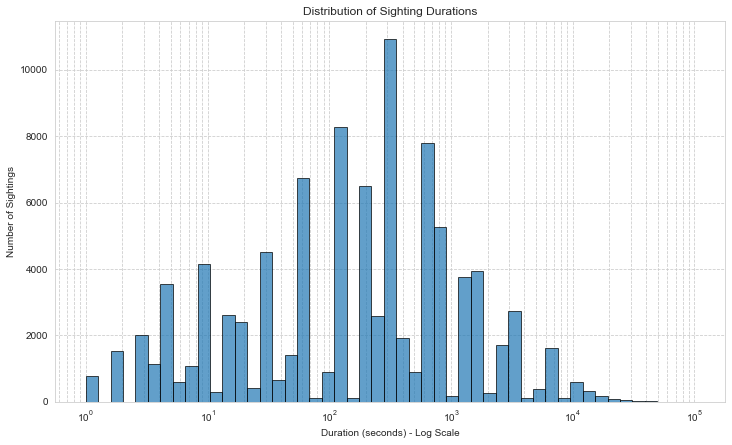

In [54]:
# Plot histogram 
plt.figure(figsize=(12, 7))
plt.hist(df['duration_seconds'], bins=np.logspace(0, 5, 50), edgecolor='black', alpha=0.7)
plt.gca().set_xscale("log")
plt.xlabel('Duration (seconds) - Log Scale')
plt.ylabel('Number of Sightings')
plt.title('Distribution of Sighting Durations')
plt.grid(True, which="both", ls="--")

plt.savefig('duration_hist.png', bbox_inches='tight')
plt.show()

The histogram shows the distribution of sighting durations on a logarithmic scale. A significant majority of sightings last for a very short duration. These could range from just a few seconds to a couple of minutes. Such brief encounters might be attributed to the fleeting nature of the phenomena or the difficulty in observing them for extended periods. As we move to the right on the x-axis (indicating longer sighting durations), the frequency of such sightings decreases. Very long durations are rare, suggesting that prolonged encounters with UFOs are not common. There's a minor bump in the frequency around the 10^3 (or 1000 seconds) mark, indicating there are a few sightings that lasted around 15-20 minutes. When interpreting these results, it's important to consider that the duration might be influenced by several factors, such as the observer's attention span, the movement of the observed object, visibility conditions, and more.

## Relationships and Correlations

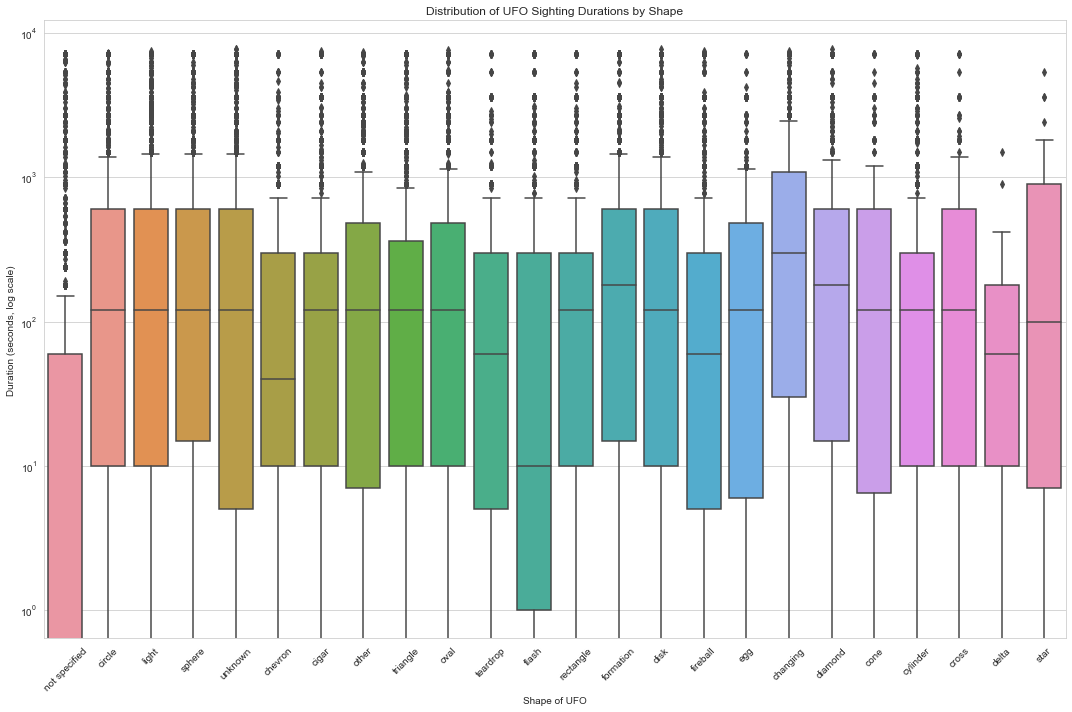

In [55]:
# Filter out some outlier durations for better visualization
filtered_data = df[df['duration_seconds'] <= 8000]

plt.figure(figsize=(15,10))
sns.boxplot(x="shape", y="duration_seconds", data=filtered_data)
plt.yscale("log")
plt.title('Distribution of UFO Sighting Durations by Shape')
plt.ylabel('Duration (seconds, log scale)')
plt.xlabel('Shape of UFO')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('shape_duration.png', bbox_inches='tight')
plt.show()

The boxplot illustrates the distribution of UFO sighting durations based on the reported shape of the UFOs. From the plot, we observe the following:

Most UFO shapes have median sighting durations that are relatively short, with many shapes having medians below 100 seconds.
Shapes like "cigar", "cylinder", "diamond", "egg", and "fireball" have relatively higher median durations than shapes like "circle", "cross", and "flash".
There is a wide range of durations for most shapes, as evidenced by the length of the boxes and whiskers. This suggests that for any given shape, sightings can last from mere seconds to several minutes.
The "triangle" shape seems to have a narrower interquartile range (IQR) compared to shapes like "light" or "sphere", indicating that the durations for "triangle" sightings are more consistent.
Several shapes have outliers (points above the top whisker), suggesting that there are occasional reports of significantly prolonged sightings.
This visualization provides insights into how reported UFO shapes might relate to the duration of the sighting, but there isn't a strict correlation between a specific shape and a longer or shorter sighting duration.

### Can you identify common themes or keywords in the descriptions of UFO sightings?

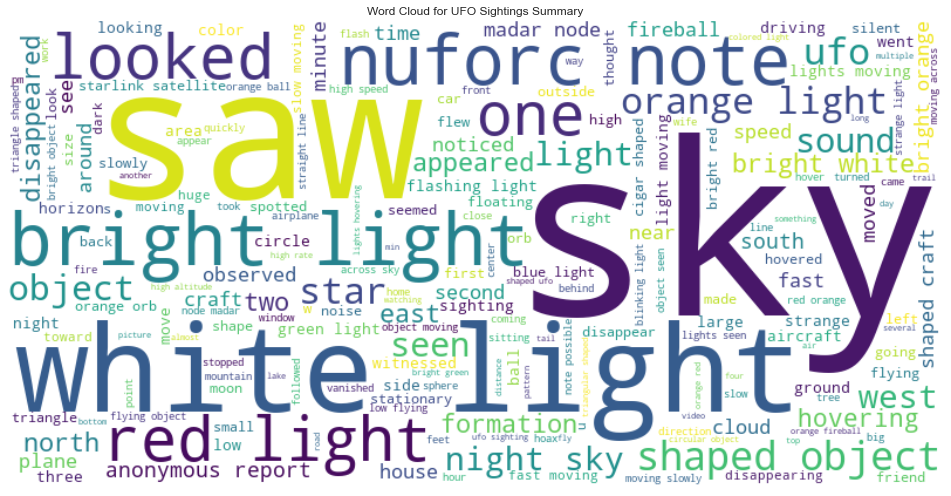

In [56]:
# Concatenating all the summary texts
summary_data = " ".join(summary for summary in df['summary'])

# Generating the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(summary_data)

# Plotting
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for UFO Sightings Summary')
plt.tight_layout()

plt.savefig('keywords_text_v1.png', bbox_inches='tight')
plt.show()

The word cloud shows a visual representation of the most frequently mentioned terms in the `text` column of the UFO sightings reports. Light is a dominant term, aligning with our earlier observation that "Light" is the most commonly reported shape.
Words like "bright", "sky", "moving", "saw", and "object" are prominent, indicating common descriptions of the sightings.
Other terms such as "red", "white", and "green" suggest the colors that are often associated with these sightings.
The prominence of terms like "flying", "north", "south", "east", and "west" gives insights into the directionality and movement of the observed objects.

## Unraveling Hypothesis

In [57]:
df.columns

Index(['summary', 'country', 'city', 'state', 'date_time', 'shape', 'duration',
       'posted', 'city_latitude', 'city_longitude', 'duration_seconds', 'year',
       'continent', 'hour', 'month_str', 'day', 'sighting_date', 'area_type'],
      dtype='object')

In [58]:
df['month'] = df['date_time'].dt.month

### Hypothesis 1: Sightings by month

In [59]:
# Test the hypothesis that UFO sightings are more common during specific months

# Grouping data by month to get observed frequencies
observed_frequencies_month = df['month'].value_counts().sort_index().values

# Expected frequencies assuming even distribution throughout the year
total_month_sightings = df['month'].count()
expected_frequencies_month = [total_month_sightings / 12] * 12

# Performing the chi-squared test
chi2_stat, p_val = chisquare(observed_frequencies_month, expected_frequencies_month)

chi2_stat, p_val

(4596.350200859821, 0.0)

The results from the chi-squared test are as follows:

Chi-squared statistic: ≈ 4596.35
p-value: 0.0

### Hypothesis 2: Urban vs Rural

In [60]:
# Counting the number of sightings for each area type (Urban and Rural)
observed_area_counts = df['area_type'].value_counts()

# If sightings were uniformly distributed, we would expect the total number of sightings divided by 2 for both categories
expected_area_counts = [len(df) / 2, len(df) / 2]

# Perform chi-squared goodness-of-fit test
chi2_stat_area, p_val_area = stats.chisquare(observed_area_counts, expected_area_counts)

chi2_stat_area, p_val_area

(56565.093558390305, 0.0)

The results from the chi-squared test are as follows:

Chi-squared statistic: ≈ 56565.09
p-value: 0.0

### Hypothesis 3: Sightings by Time of Day

In [61]:
# Counting the number of sightings for each hour
observed_counts_hourly = df['hour'].value_counts().sort_index()

# If sightings were uniformly distributed, we would expect the total number of sightings divided by 24 for each hour
expected_counts_hourly = [len(df) / 24] * 24

# Perform chi-squared goodness-of-fit test
chi2_stat_hourly, p_val_hourly = stats.chisquare(observed_counts_hourly, expected_counts_hourly)

chi2_stat_hourly, p_val_hourly

(97270.77482556908, 0.0)

The results from the chi-squared test are as follows:

Chi-squared statistic: ≈ 97270.77
p-value: 0.0